In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ml_experiment_results.csv")


## Compare Performance Across Datasets


### Accuracy by Model and Dataset


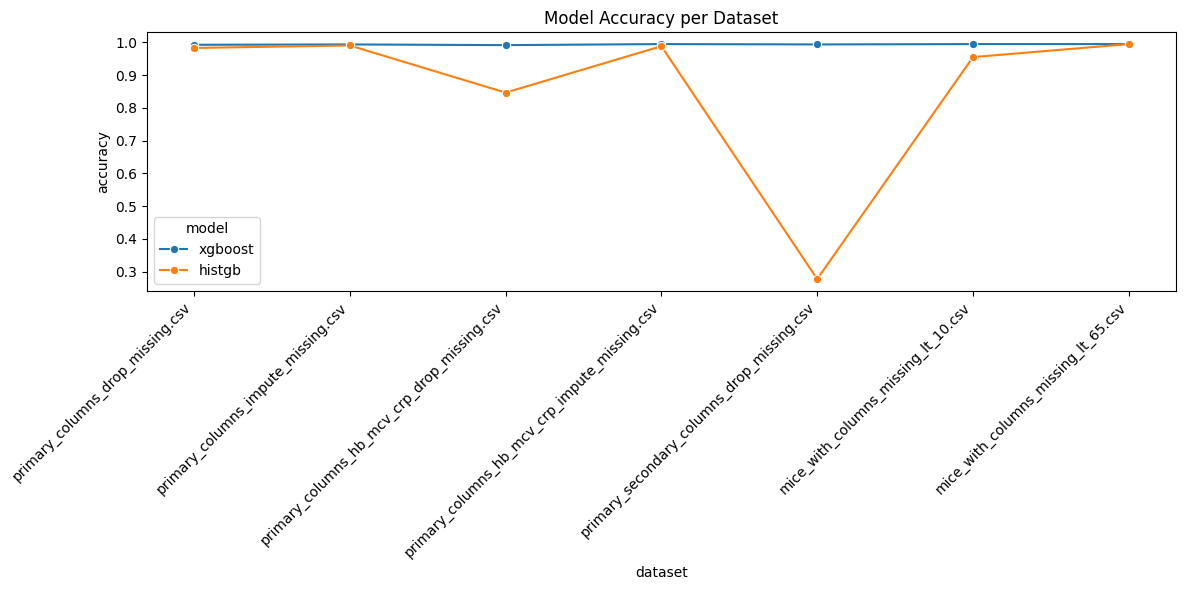

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="dataset", y="accuracy", hue="model", marker="o")
plt.xticks(rotation=45, ha="right")
plt.title("Model Accuracy per Dataset")
plt.tight_layout()
plt.show()


### Macro F1

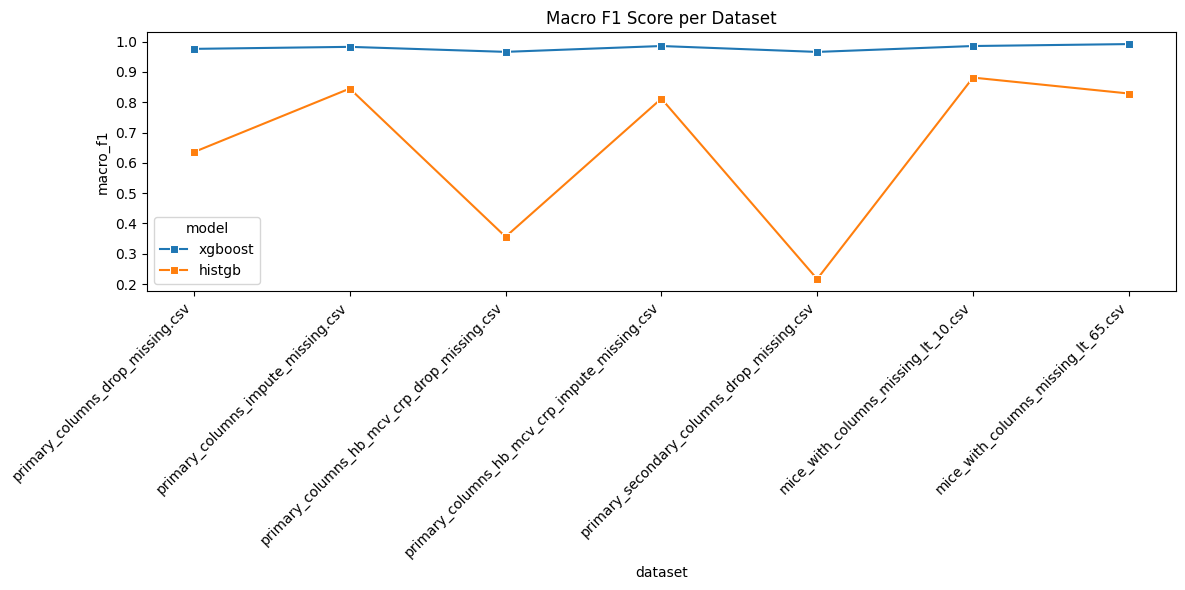

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="dataset", y="macro_f1", hue="model", marker="s")
plt.xticks(rotation=45, ha="right")
plt.title("Macro F1 Score per Dataset")
plt.tight_layout()
plt.show()


## Compare All Models per Dataset


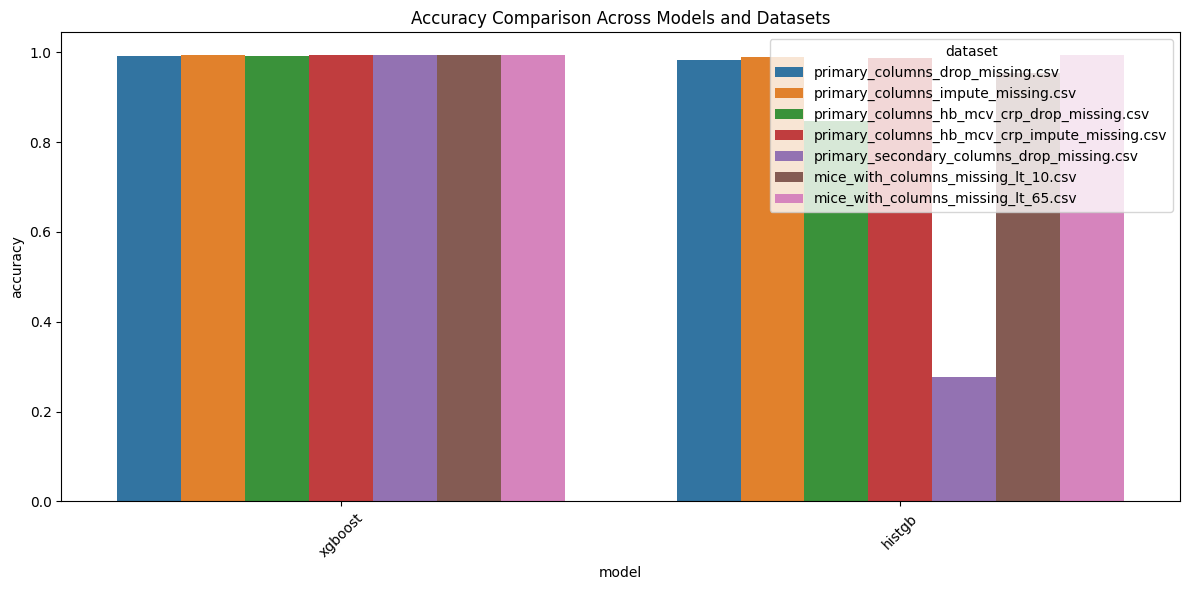

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="model", y="accuracy", hue="dataset")
plt.title("Accuracy Comparison Across Models and Datasets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Accuracy Table

### Pivot and Heatmap


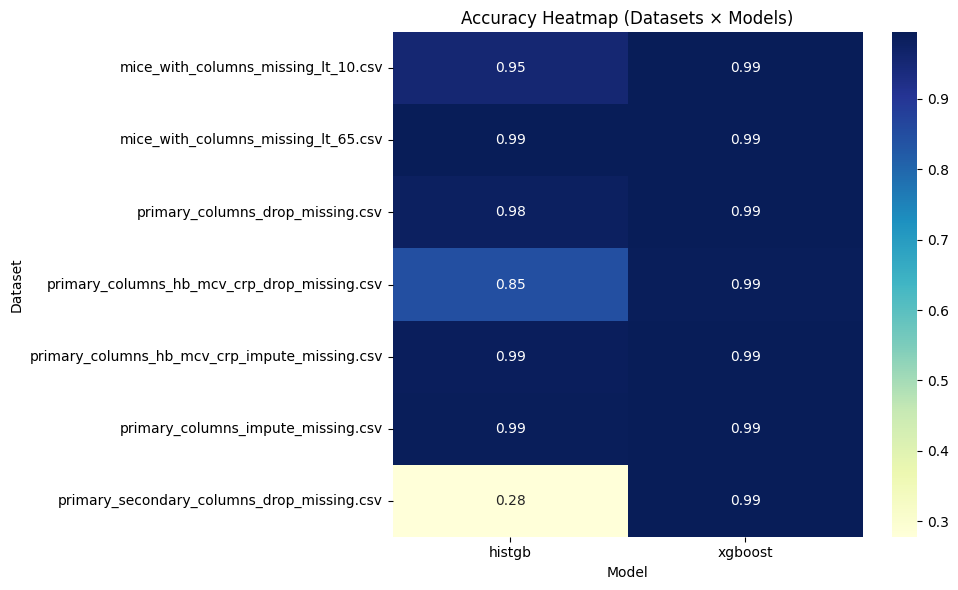

In [5]:
pivot_acc = df.pivot(index="dataset", columns="model", values="accuracy")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_acc, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Accuracy Heatmap (Datasets × Models)")
plt.ylabel("Dataset")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


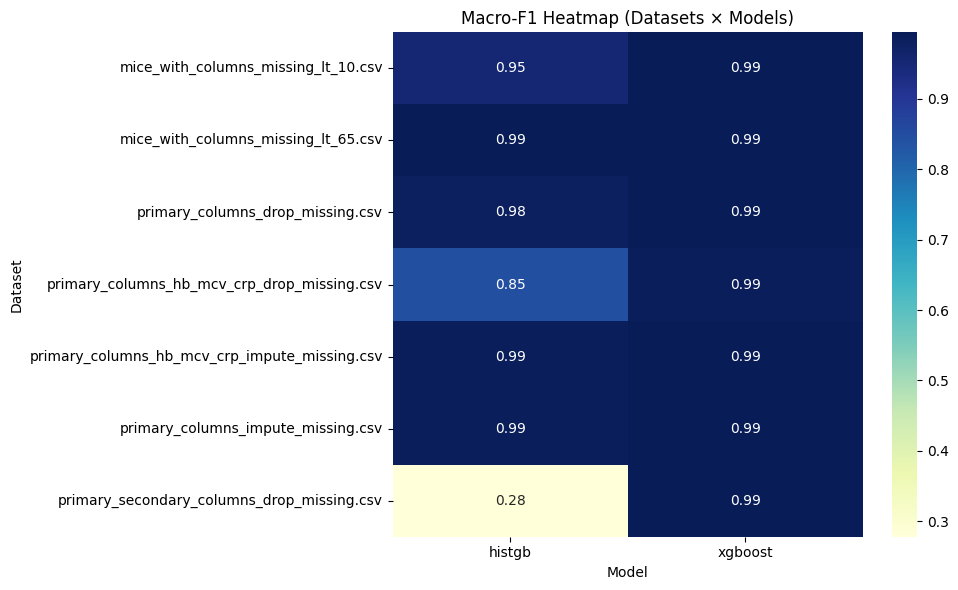

In [6]:
pivot_macro_f1 = df.pivot(index="dataset", columns="model", values="macro_f1")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_acc, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Macro-F1 Heatmap (Datasets × Models)")
plt.ylabel("Dataset")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


## Results 

/var/folders/5f/7zn60cf53sxc74yn0mv8wdf80000gn/T/ipykernel_6841/3136217448.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("ml_metric_comparison_table.png", bbox_inches="tight", dpi=300)
/Users/galactica/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


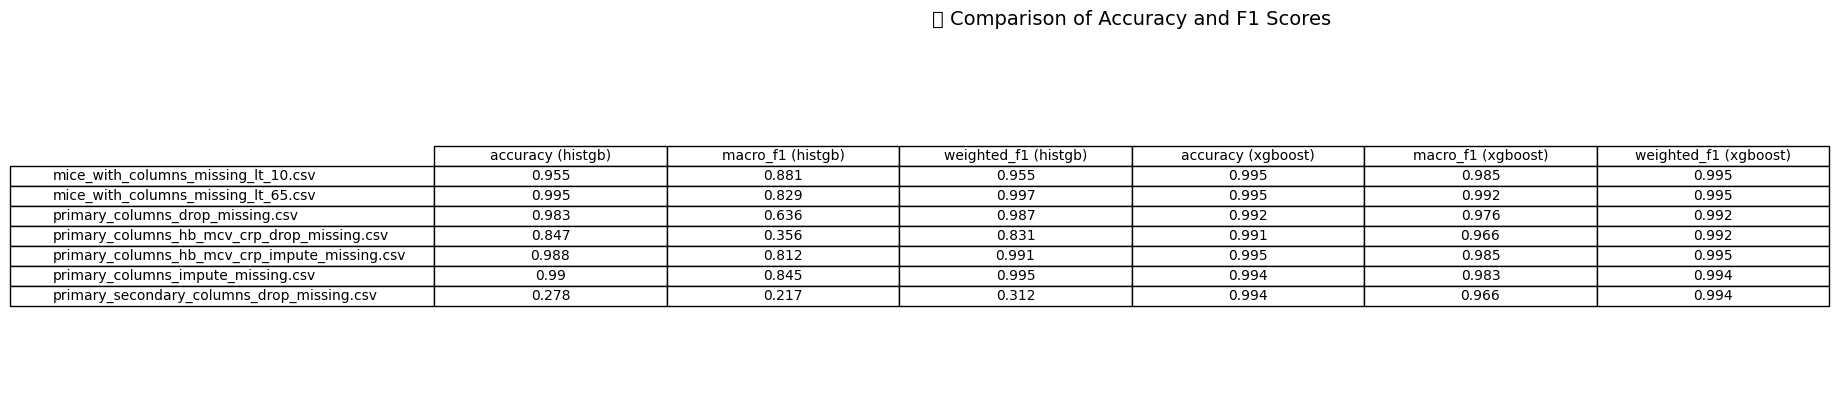

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the results
df = pd.read_csv("ml_experiment_results.csv")
df[["accuracy", "macro_f1", "weighted_f1"]] = df[["accuracy", "macro_f1", "weighted_f1"]].round(3)

# Pivot and stack
table = df.pivot(index="dataset", columns="model")[["accuracy", "macro_f1", "weighted_f1"]]
table = table.swaplevel(axis=1).sort_index(axis=1)

# Convert to string for pretty table
str_table = table.copy().astype(str)

# Plotting
fig, ax = plt.subplots(figsize=(15, len(table) * 0.5 + 1))
ax.axis('off')

# Title
plt.title("📊 Comparison of Accuracy and F1 Scores", fontsize=14, pad=20)

# Create table
mpl_table = ax.table(cellText=str_table.values,
                     rowLabels=str_table.index,
                     colLabels=["{} ({})".format(metric, model)
                                for model, metric in str_table.columns],
                     cellLoc='center',
                     loc='center')

mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(10)
mpl_table.scale(1.2, 1.2)

# Save as image (optional)
plt.savefig("ml_metric_comparison_table.png", bbox_inches="tight", dpi=300)
plt.show()
